In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

data=pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/insurance.csv')
data.head()
#data.info()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


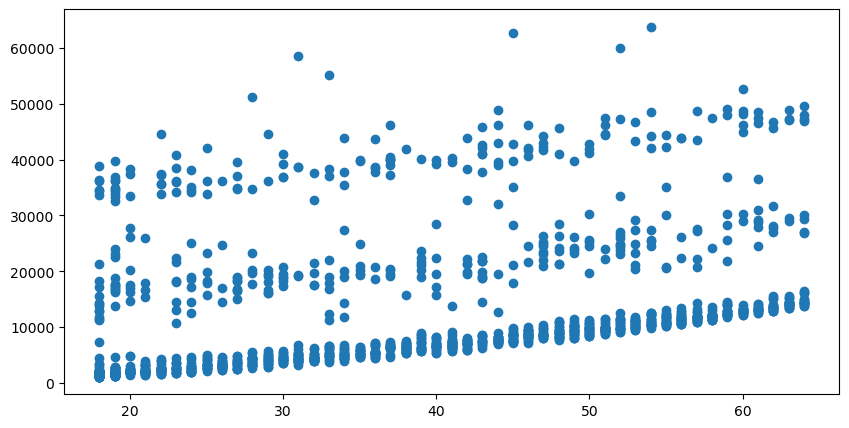

In [4]:
x=data['age']
y=data['charges']

plt.figure(figsize=(10,5))
plt.scatter(x,y)
plt.show()

In [5]:
x=np.array(data['age'])
y=np.array(data['charges'])
x = x.reshape(1338,1)
y = y.reshape(1338,1)

lr = LinearRegression()
lr.fit(x,y)

#LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None)
print('선형 회귀 모델 결과')
print('절편: ', lr.intercept_, '계수: ', lr.coef_, '결정계수: ', lr.score(x,y))

선형 회귀 모델 결과
절편:  [3165.88500606] 계수:  [[257.72261867]] 결정계수:  0.08940589967885804


In [6]:
x_new=[[19],[64]]
y_hat=lr.predict(x_new)
print(y_hat)

[[ 8062.61476073]
 [19660.13260074]]


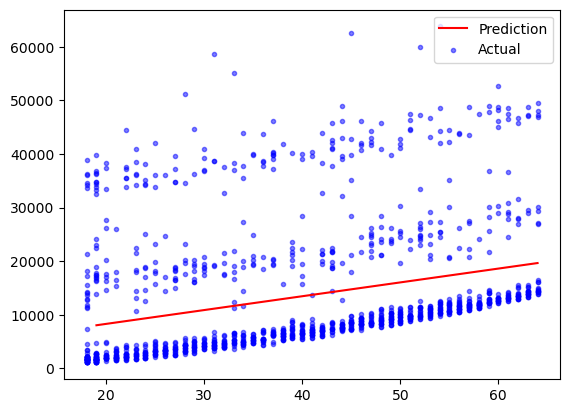

In [7]:
plt.plot(x_new, y_hat, '-r', label='Prediction')
plt.scatter(x,y,color='b', marker='.',label='Actual', alpha=0.5)
plt.legend(loc='upper right')
plt.show()

In [8]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, random_state=200)
sgd_reg.fit(x,y.ravel())

print('SGD(확률경사하강법) 회귀 모델 결과')
print('절편: ', sgd_reg.intercept_, '계수: ', sgd_reg.coef_, '결정계수: ', sgd_reg.score(x,y))

SGD(확률경사하강법) 회귀 모델 결과
절편:  [-521.92762234] 계수:  [772.4570189] 결정계수:  -2.1235636970169045


[14154.75573674 48915.32158718]


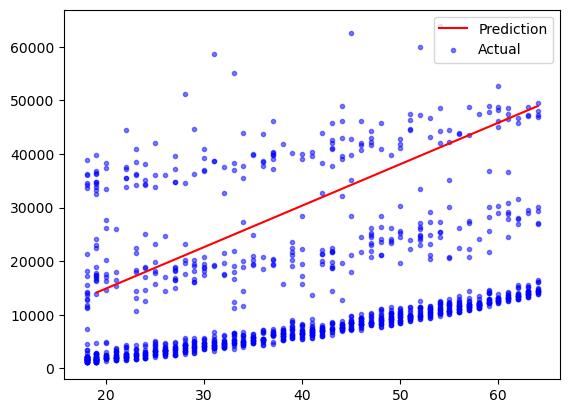

In [9]:
x_new=[[19],[64]]
y_hat=sgd_reg.predict(x_new)
print(y_hat)

plt.plot(x_new, y_hat, '-r', label='Prediction')
plt.scatter(x,y,color='b', marker='.',label='Actual', alpha=0.5)
plt.legend(loc='upper right')
plt.show()

In [11]:
#다항회귀 (Polynomial Regression)
cereal = pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/cereal.csv')
cereal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [12]:
cereal=cereal[cereal.columns[3:]]
cereal=cereal[cereal.sugars>=0]
cereal.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


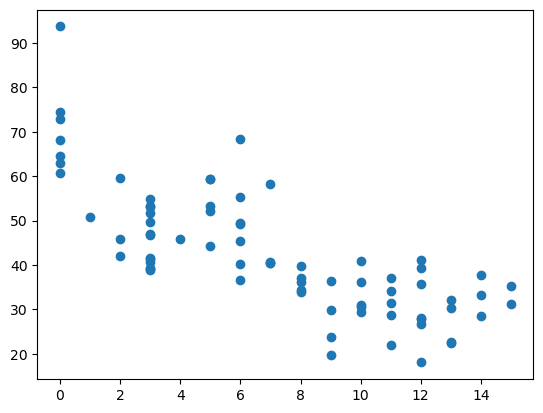

In [22]:
cereal2=cereal[['sugars','rating']]
cereal2=cereal2.sort_values(by=['sugars'])
cereal2=cereal2.reset_index(drop=True)

x=cereal2['sugars'].values
y=cereal2['rating'].values

plt.scatter(x,y)
plt.show()

In [24]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = \
train_test_split(x,y,test_size=0.3,random_state=1)
print('Train set: ',x_train.shape,y_train.shape)
print('Test set: ',x_test.shape,y_test.shape)

Train set:  (53,) (53,)
Test set:  (23,) (23,)


In [26]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=2)
x_poly = poly_reg.fit_transform(x_train.reshape(-1,1))

from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_poly,y_train)

LinearRegression()

In [28]:
x_test_poly = poly_reg.transform(x_test.reshape(-1,1))
pred = reg.predict(x_test_poly)

np.set_printoptions(precision=2)  # 소수점 둘째자리까지 표현
print(np.concatenate((pred.reshape(len(pred),1),y_test.reshape(len(y_test),1)),1))

[[51.63 46.66]
 [32.1  28.74]
 [55.79 59.64]
 [31.08 37.84]
 [32.1  31.44]
 [44.46 44.33]
 [38.82 40.4 ]
 [41.45 55.33]
 [41.45 49.12]
 [31.38 27.75]
 [36.56 34.38]
 [34.7  29.92]
 [65.25 63.01]
 [33.21 31.07]
 [44.46 52.08]
 [38.82 40.45]
 [51.63 53.13]
 [36.56 33.98]
 [41.45 49.51]
 [31.04 22.74]
 [31.38 39.26]
 [31.5  31.23]
 [32.1  21.87]]


In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print('mae = %.2f' % mean_absolute_error(y_test,pred))
print('mse = %.2f' % mean_squared_error(y_test,pred))
print('rmse = %.2f' % np.sqrt(mean_squared_error(y_test,pred)))
print('r2 = %.2f%%' % (r2_score(y_test,pred)*100))

mae = 4.61
mse = 33.57
rmse = 5.79
r2 = 74.38%


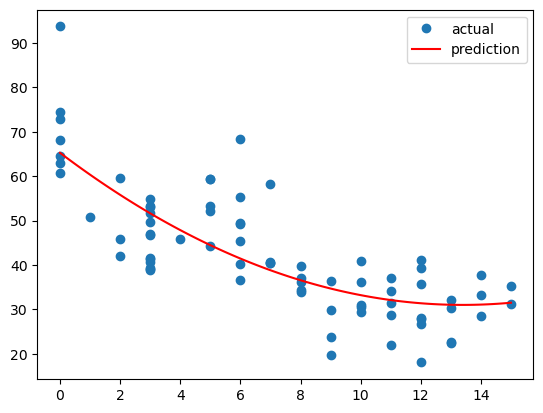

In [38]:
x_new = np.linspace(0,15,100).reshape(100,1)
x_new_poly = poly_reg.transform(x_new)
y_new = reg.predict(x_new_poly)

plt.plot(x,y,'o', label='actual')
plt.plot(x_new,y_new,'r-', label='prediction')
plt.legend(loc='upper right')
plt.show()

In [39]:
#고차 다항 회귀 분석
x = cereal.iloc[:,:-1].values
y = cereal.iloc[:,-1].values

x_train, x_test, y_train, y_test = \
train_test_split(x,y,test_size=0.3,random_state=1)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(53, 12) (23, 12) (53,) (23,)


In [41]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=2)
x_train_poly=poly_reg.fit_transform(x_train)

from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train_poly,y_train)

LinearRegression()

In [42]:
x_test_poly = poly_reg.transform(x_test)
pred = reg.predict(x_test_poly)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print('mae = %.2f' % mean_absolute_error(y_test,pred))
print('mse = %.2f' % mean_squared_error(y_test,pred))
print('rmse = %.2f' % np.sqrt(mean_squared_error(y_test,pred)))
print('r2 = %.2f%%' % (r2_score(y_test,pred)*100))

mae = 2.09
mse = 8.97
rmse = 2.99
r2 = 93.12%
